In [1]:
import pandas as pd
import numpy as np

In [2]:
with open('/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/FIA/fia_individual_data_files/CO_COND.csv') as fiacond:
    cond1 = pd.read_csv(fiacond, delimiter = ',')
temp_cond = cond1.filter(['PLT_CN','INVYR','COND_STATUS_CD','FORTYPCD','STDAGE','CONDPROP_UNADJ','SLOPE','ASPECT','DSTRBCD1','DSTRBYR1',
                          'DSTRBCD2','DSTRBYR2','DSTRBCD3','DSTRBYR3','TRTCD1','TRTYR1','TRTCD2','TRTYR2','TRTCD3','TRTYR3'])

In [3]:
temp_cond1 = temp_cond[temp_cond['CONDPROP_UNADJ']==1].reset_index(drop=True)

In [4]:
temp_cond2 = temp_cond1[temp_cond1['INVYR']>1998].reset_index(drop=True)

In [5]:
temp_cond3 = temp_cond2[temp_cond2['COND_STATUS_CD']==1].reset_index(drop=True)

In [6]:
with open('/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/FIA/fia_individual_data_files/CO_PLOT.csv') as fiaplot:
    plot1 = pd.read_csv(fiaplot, delimiter = ',')
temp_plot = plot1.filter(['CN','PREV_PLT_CN','MEASYEAR','ELEV','LAT','LON'])

In [7]:
with open('/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/FIA/fia_individual_data_files/CO_TREE.csv') as fiatree:
    tree1 = pd.read_csv(fiatree, delimiter = ',')
temp_tree = tree1.filter(['CN','PLT_CN','PREV_TRE_CN','INVYR','STATUSCD','SPCD','SPGRPCD','DIA','DRYBIO_AG','TPA_UNADJ','BHAGE'])

/tmp/ipykernel_7695/2548877571.py:2: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  tree1 = pd.read_csv(fiatree, delimiter = ',')


In [8]:
filter1 = temp_tree.loc[temp_tree['INVYR'] > 1998].reset_index(drop = True)
filter2 = filter1.loc[filter1['STATUSCD'] == 1].reset_index(drop = True)

In [9]:
filter2

,CN,PLT_CN,PREV_TRE_CN,INVYR,STATUSCD,SPCD,SPGRPCD,DIA,DRYBIO_AG,TPA_UNADJ,BHAGE
0,3642346010690,3642338010690,NaN,2002,1,122.0,11,6.0,89.893152,6.018046,91.0
1,3642347010690,3642338010690,NaN,2002,1,122.0,11,6.5,127.149388,6.018046,NaN
2,3642351010690,3642338010690,NaN,2002,1,122.0,11,12.9,648.059453,6.018046,136.0
3,3642348010690,3642338010690,NaN,2002,1,122.0,11,6.5,106.312904,6.018046,NaN
4,3642349010690,3642338010690,NaN,2002,1,122.0,11,9.9,346.224840,6.018046,102.0
...,...,...,...,...,...,...,...,...,...,...,...
199905,756438785290487,431918246489998,4.171389e+13,2019,1,69.0,23,9.7,78.255119,6.018046,NaN
199906,756438786290487,431918246489998,NaN,2019,1,69.0,23,5.7,26.613224,6.018046,NaN
199907,756438787290487,431918246489998,NaN,2019,1,69.0,23,5.4,23.753057,6.018046,NaN
199908,756434457290487,431918140489998,3.946764e+13,2019,1,69.0,23,10.0,99.240779,6.018046,NaN


In [10]:
a = pd.merge(filter2,filter2,left_on='PREV_TRE_CN',right_on='CN',how='inner')

In [11]:
b = a[a['BHAGE_y']>0].reset_index(drop=True)

In [12]:
b['growth_rate'] = (b['DRYBIO_AG_x']-b['DRYBIO_AG_y'])/(b['INVYR_x']-b['INVYR_y'])

In [13]:
import statistics

In [14]:
positive_gr_dia = b.loc[b['growth_rate'] >= 0].reset_index(drop = True)

y = positive_gr_dia['growth_rate']

stdev = statistics.stdev(y)
mean = np.mean(y)
gr_max = np.max(y)
gr_min = np.min(y)

three_std_max = 3*stdev+mean

gr_dia_outliers_rm = positive_gr_dia.loc[positive_gr_dia['growth_rate'] < three_std_max].reset_index(drop = True)

In [15]:
gr_dia_outliers_rm

,CN_x,PLT_CN_x,PREV_TRE_CN_x,INVYR_x,STATUSCD_x,SPCD_x,SPGRPCD_x,DIA_x,DRYBIO_AG_x,TPA_UNADJ_x,...,PREV_TRE_CN_y,INVYR_y,STATUSCD_y,SPCD_y,SPGRPCD_y,DIA_y,DRYBIO_AG_y,TPA_UNADJ_y,BHAGE_y,growth_rate
0,190835710020004,40391835010690,3.642349e+12,2012,1,122.0,11,10.8,446.559629,6.018046,...,NaN,2002,1,122.0,11,9.9,346.224840,6.018046,102.0,10.033479
1,190835712020004,40391835010690,3.642351e+12,2012,1,122.0,11,13.4,720.607893,6.018046,...,NaN,2002,1,122.0,11,12.9,648.059453,6.018046,136.0,7.254844
2,190835713020004,40391835010690,3.642352e+12,2012,1,122.0,11,17.1,1247.044327,6.018046,...,NaN,2002,1,122.0,11,16.9,1245.723951,6.018046,146.0,0.132038
3,190835714020004,40391835010690,3.642353e+12,2012,1,122.0,11,14.1,737.665225,6.018046,...,NaN,2002,1,122.0,11,13.0,593.691408,6.018046,59.0,14.397382
4,190835593020004,40391830010690,3.642381e+12,2012,1,202.0,10,8.2,225.657797,6.018046,...,NaN,2002,1,202.0,10,7.7,185.809580,6.018046,87.0,3.984822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,756421475290487,431917727489998,3.946974e+13,2019,1,19.0,12,20.0,2612.377114,6.018046,...,NaN,2009,1,19.0,12,19.0,2207.622919,6.018046,82.0,40.475420
9733,756431891290487,431917897489998,3.947042e+13,2019,1,746.0,44,7.9,178.383633,6.018046,...,NaN,2009,1,746.0,44,7.4,148.282872,6.018046,68.0,3.010076
9734,756431898290487,431917897489998,3.947043e+13,2019,1,746.0,44,12.3,584.253865,6.018046,...,NaN,2009,1,746.0,44,11.5,512.097789,6.018046,80.0,7.215608
9735,756431899290487,431917897489998,3.947043e+13,2019,1,746.0,44,5.8,67.253792,6.018046,...,NaN,2009,1,746.0,44,5.5,60.604776,6.018046,73.0,0.664902


In [16]:
import matplotlib.pyplot as plt

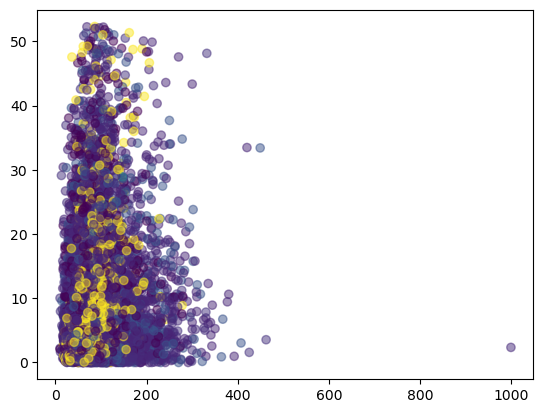

In [17]:
plt.scatter(gr_dia_outliers_rm['BHAGE_y'], gr_dia_outliers_rm['growth_rate'], c=gr_dia_outliers_rm['SPCD_x'], alpha=0.5)

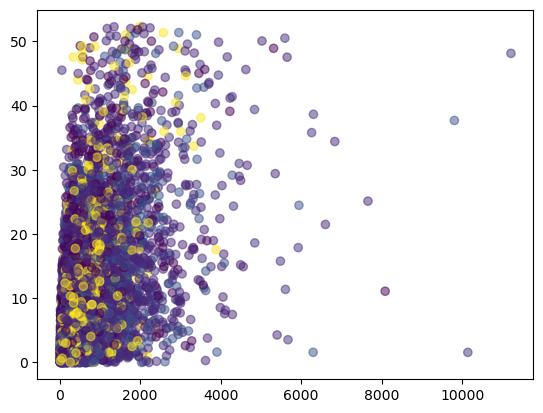

In [18]:
plt.scatter(gr_dia_outliers_rm['DRYBIO_AG_y'], gr_dia_outliers_rm['growth_rate'], c=gr_dia_outliers_rm['SPCD_x'], alpha=0.5)

In [19]:
gr_dia_outliers_rm['SPCD_x'].unique()[0]

122.0

In [20]:
len(gr_dia_outliers_rm['SPCD_x'].unique())

17

In [21]:
import seaborn as sns

In [25]:
species_array = [122,202,108,93,102,113,746,19,96,18,15,749]
species_names = ['Ponderosa Pine','Douglas-fir','Lodgepole Pine','Engelmann Spruce',
                 'Rocky Mountain Bristlecone Pine','Limber Pine','Quaking Aspen',
                 'Subalpine Fir','Blue Spruce','Corkbark Fir','White Fir','Narrowleaf Cottonwood']

In [36]:
bins = np.asarray([1,20,40,80,120,200,300,400,600,800])

   age_class_left  median_growth_rate
0               1            8.290717
1              20            6.177497
2              40            6.688340
3              80            6.963150
4             120            7.813882
5             200            6.712215
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1            6.300918
1              20            6.176581
2              40            5.681666
3              80            6.412731
4             120            7.122696
5             200            9.440646
6             300            6.744002
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1            5.473566
1              20            5.481457
2              40            4.094258
3              80            3.088238
4             120            3.809740
5             200            3.198629
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1            5.029309
1              20            5.550222
2              40            6.412510
3              80            7.084042
4             120            6.960175
5             200            8.314301
6             300            6.784864
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1                 NaN
1              20            1.639236
2              40            1.591959
3              80            2.169335
4             120            1.273131
5             200                 NaN
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1                 NaN
1              20            2.843374
2              40            1.922743
3              80            2.989266
4             120            3.028268
5             200            3.408696
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1                 NaN
1              20            1.558247
2              40            4.448302
3              80            7.166425
4             120            8.984835
5             200           10.239968
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1            3.756335
1              20            6.057072
2              40            5.863140
3              80            6.154753
4             120            6.610013
5             200           10.023142
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1                 NaN
1              20            9.180181
2              40            9.435820
3              80           12.386624
4             120           12.409209
5             200                 NaN
6             300                 NaN
7             400                 NaN
   age_class_left  median_growth_rate
0               1                 NaN
1              20            5.878959
2              40            5.553215
3              80            6.285400
4             120            6.811237
5             200                 NaN
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (4) th

   age_class_left  median_growth_rate
0               1                 NaN
1              20            5.759219
2              40            5.790210
3              80            5.712796
4             120           11.084897
5             200                 NaN
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


   age_class_left  median_growth_rate
0               1                 NaN
1              20                 NaN
2              40           13.569851
3              80           28.998648
4             120                 NaN
5             200                 NaN
6             300                 NaN
7             400                 NaN


/tmp/ipykernel_4504/3833815661.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
/tmp/ipykernel_4504/3833815661.py:115: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)


Text(-0.02, 0.5, 'Biomass Growth Rate (lb/yr)')

<Figure size 3500x6800 with 0 Axes>

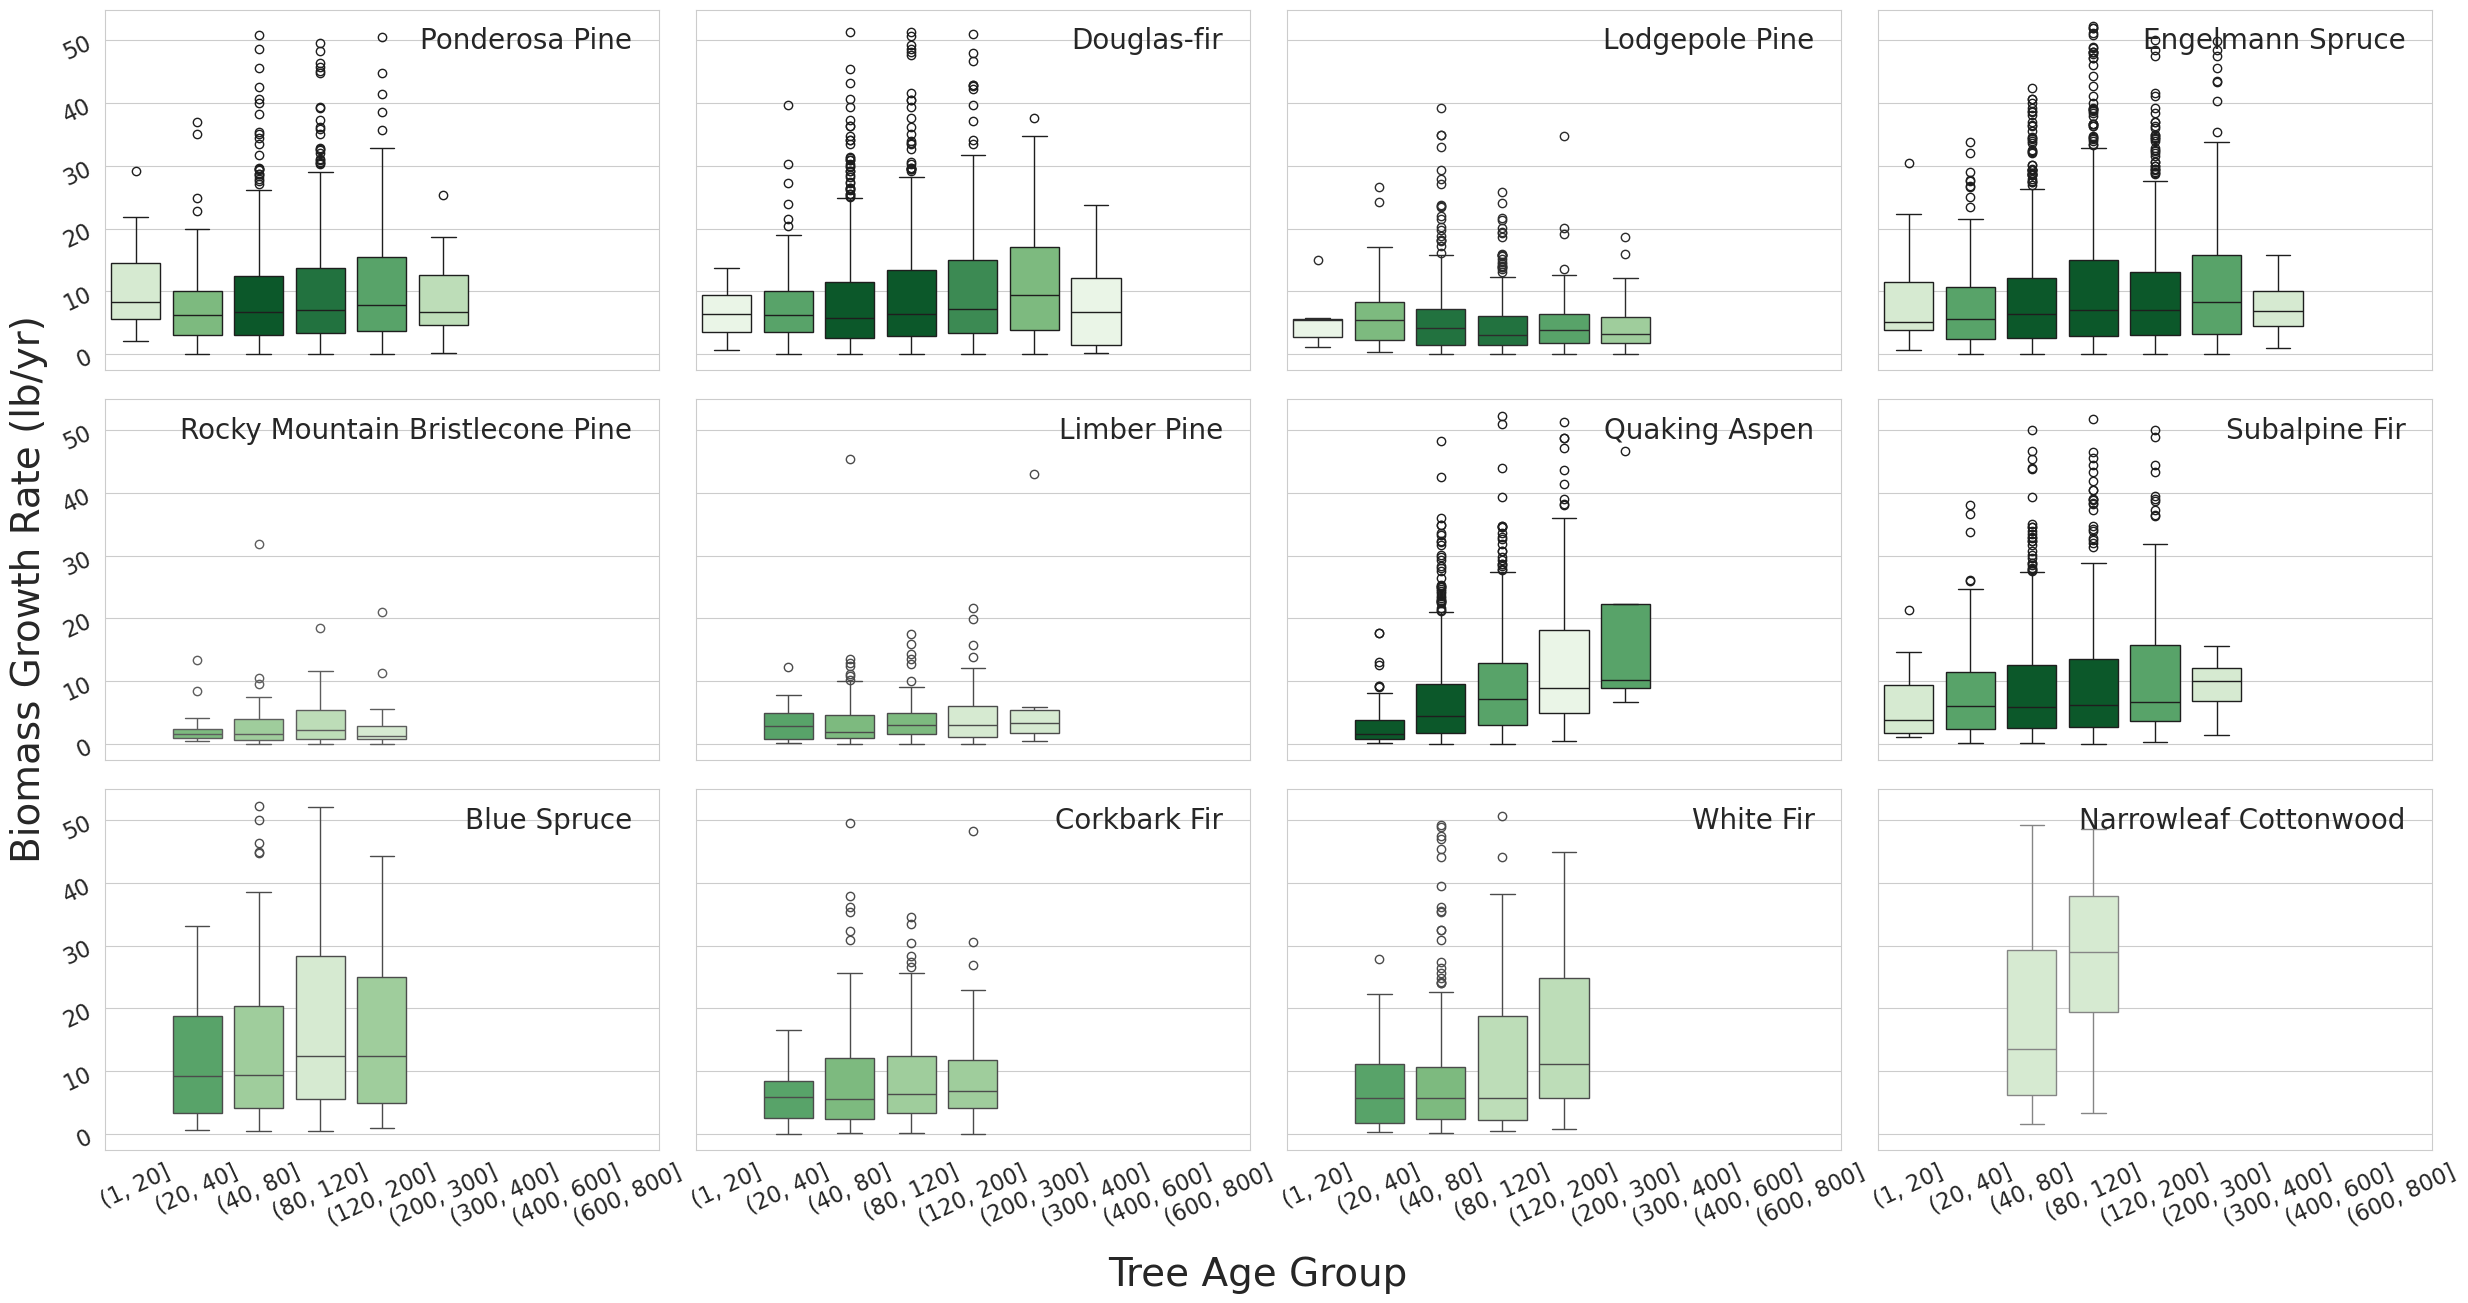

In [104]:
fig = plt.figure(figsize=(35,68))


n_species = len(species_array)
fig, axes = plt.subplots(nrows=3, ncols=4,sharex=True,sharey=True,figsize=(24,12))
fig.tight_layout()
for i, ax in enumerate(axes.flatten()):
    growth_rate_species_table = pd.DataFrame()
    current_species = species_array[i]
    current_species_name = species_names[i]
    pd_for_plot = gr_dia_outliers_rm[gr_dia_outliers_rm['SPCD_x']==current_species].reset_index()

    x = pd_for_plot['BHAGE_y']
    y = pd_for_plot['growth_rate']

    bins = np.asarray([1,20,40,80,120,200,300,400,600,800])
    # 1,20,40,80,120,200,300,400,600,800
    # 1,20,40,80,120,200,300,400,500
    # 1,10,20,40,60,80,100,120,140,160
    # 1,10,20,40,60,80,100,120,140,160
    # 1,10,20,30,40,60,80,100,120
    # 1,20,40,80,120,200,300,400,600,800,1000,1200

    pd_for_plot['age_class'] = pd.cut(x, bins)
    

    # pd_for_plot['per_hectare'] = pd_for_plot[variable+'_growth_tree_rate']*pd_for_plot['TPA_UNADJ_2']

    # ntrees_list = []
    for a in pd_for_plot['age_class'].unique().dropna():
        ntrees = pd_for_plot[pd_for_plot['age_class']==a].shape[0]
        # print(ntrees)
        if ntrees <= 4:
            pd_for_plot = pd_for_plot.drop(pd_for_plot[pd_for_plot.age_class == a].index).reset_index(drop = True)
        # ntrees_list.append(ntrees) 

    ntrees_pd = pd.DataFrame()
    left_list = []
    ntrees_list = []
    for a in pd_for_plot['age_class'].unique().dropna():
        current_left = a.left
        current_right = a.right
        ntrees = pd_for_plot[pd_for_plot['age_class']==a].shape[0]
        ntrees_list.append(ntrees)
        left_list.append(current_left)
    ntrees_pd['left'] = pd.Series(left_list)
    ntrees_pd['ntrees'] = pd.Series(ntrees_list)
    ntrees_pd_sort = ntrees_pd.sort_values('left').reset_index(drop = True)

    ntrees_list_new = ntrees_pd_sort['ntrees']
            
    custom_palette=[None] * len(ntrees_list_new)

    for n in np.arange(0,len(ntrees_list_new)):
        n_trees  = ntrees_list_new[n]
        if n_trees <= 10:
            custom_palette[n] = '#e9f7e5'
        else:
            if n_trees > 10 and n_trees <= 20:
                custom_palette[n] = '#d3eecd'
            else:
                if n_trees > 20 and n_trees <= 30:
                    custom_palette[n] = '#b8e3b2'
                else:
                    if n_trees > 30 and n_trees <= 50:
                        custom_palette[n] = '#98d594'
                    else:
                        if n_trees > 50 and n_trees <= 100:
                            custom_palette[n] = '#73c476'
                        else:
                            if n_trees > 100 and n_trees <= 200:
                                custom_palette[n] = '#4bb062'
                            else:
                                if n_trees > 200 and n_trees <= 300:
                                    custom_palette[n] = '#2f974e'
                                else:
                                    if n_trees > 300 and n_trees <= 400:
                                        custom_palette[n] = '#157f3b'
                                    else:
                                        if n_trees > 400:
                                            custom_palette[n] = '#006428'    
    medians = []
    bin_lefts = []
    bin_rights = []

    for i in np.arange(0,8):
        bin_left = bins[i]
        bin_right = bins[i+1]

        current_table = pd_for_plot[(pd_for_plot['BHAGE_y']>bin_left) & (pd_for_plot['BHAGE_y']<= bin_right)]
        current_median = current_table['growth_rate'].median()
            # current_median = current_table[variable+'_growth_tree_rate']*current_table['TPA_UNADJ_2'].median()

        medians.append(current_median)
        bin_lefts.append(bin_left)
        bin_rights.append(bin_right)

    # pd_for_plot['age_class'] = pd.cut(pd_for_plot['predicts_bc_y'], bins)
    growth_rate_species_table['age_class_left'] = bin_lefts
    growth_rate_species_table['median_growth_rate'] = medians

    print(growth_rate_species_table)
    # fig = plt.figure(figsize=(8,4))
    # ax = fig.add_subplot(1,1,1)
    ax.annotate(current_species_name, xy=(0.95, 0.95), xytext =(0.95, 0.95),va='top',ha='right',xycoords='axes fraction', textcoords='offset points',fontsize=20)
    ax.tick_params(axis='both', labelsize=16,labelrotation=25)
#     ax.set_xlim([0, 720])
#     ax.set_ylim([0, 0.38])
    sns.set_style("whitegrid")


    sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette=custom_palette,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')


    # #     bins = np.arange(1,1012,5)
    # ax = fig.add_subplot(17, 5, i)
    # # ax.annotate(region_text, xy=(0.95, 0.95), va='top',ha='right',xycoords='axes fraction', textcoords='offset points',fontsize=15)
    # ax.tick_params(axis='both', labelsize=14)
    # #     ax.set_xlim([0, 720])
    # #     ax.set_ylim([0, 0.38])
    # sns.set_style("whitegrid")
    
    # sns.boxplot(x = 'age_class', y = 'growth_rate', data = pd_for_plot,palette="Greens")
    growth_rate_species_table.to_csv('/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/FIA/'+current_species_name+'_growth_rate.csv')
fig.text(0.5, -0.08, 'Tree Age Group', ha='center',fontsize=28)
fig.text(-0.02, 0.5, 'Biomass Growth Rate (lb/yr)', va='center', rotation='vertical',fontsize=28)

plot level: 
for each plot:
dominant species
average age
number of trees

In [22]:
import math

In [23]:
dominant_species_table = pd.DataFrame()

pltcns = []
most_dominant = []
second_dominant = []
third_dominant = []
fourth_dominant = []
most_proportions = []
second_proportions = []
third_proportions = []
fourth_proportions = []
counts = []

all_trees = filter2

unique_plots = all_trees['PLT_CN'].unique()
for plot in unique_plots:
    pltcn = plot
    current_trees = all_trees[all_trees['PLT_CN']==pltcn].reset_index()

    current_trees['BA'] = round((current_trees['DIA']/2)**2*math.pi,2)
    large_trees = current_trees[(current_trees['DIA']>=5)]

    count = large_trees['TPA_UNADJ'].sum()
    
    nspecies = len(current_trees['SPCD'].unique())
    spgrp_counts = current_trees.groupby(['SPCD']).BA.sum()
    most_count = np.sort(spgrp_counts.values)[-1:][0]
    # second_count = np.sort(spgrp_counts.values)[-2:-1][0]
    # third_count = np.sort(spgrp_counts.values)[-3:-2][0]
    # fourth_count = np.sort(spgrp_counts.values)[-4:-3][0]
    most_spgrp = spgrp_counts[spgrp_counts==most_count].index[0]
    # second_spgrp = spgrp_counts[spgrp_counts==second_count].index[0]
    # third_spgrp = spgrp_counts[spgrp_counts==third_count].index[0]
    # fourth_spgrp = spgrp_counts[spgrp_counts==fourth_count].index[0]
    pltcns.append(pltcn)
    most_dominant.append(most_spgrp)
    # second_dominant.append(second_spgrp)
    # third_dominant.append(third_spgrp)
    # fourth_dominant.append(fourth_spgrp)
    most_proportion = round(most_count/spgrp_counts.values.sum(),4)
    # second_proportion = round(second_count/spgrp_counts.values.sum(),4)
    # third_proportion = round(third_count/spgrp_counts.values.sum(),4)
    # fourth_proportion = round(fourth_count/spgrp_counts.values.sum(),4)
    most_proportions.append(most_proportion)
    counts.append(count)
    # second_proportions.append(second_proportion)
    # third_proportions.append(third_proportion)
    # fourth_proportions.append(fourth_proportion)

dominant_species_table['PLT_CN'] = pd.Series(pltcns)
# dominant_species_table['unique_species'] = pd.Series(unique_species)
dominant_species_table['most_dominant'] = pd.Series(most_dominant)
# dominant_species_table['second_dominant'] = pd.Series(second_dominant)
# dominant_species_table['third_dominant'] = pd.Series(third_dominant)
# dominant_species_table['fourth_dominant'] = pd.Series(fourth_dominant)
dominant_species_table['most_proportion'] = pd.Series(most_proportions)

dominant_species_table['count'] = pd.Series(counts)
# dominant_species_table['second_proportion'] = pd.Series(second_proportions)
# dominant_species_table['third_proportion'] = pd.Series(third_proportions)
# dominant_species_table['fourth_proportion'] = pd.Series(fourth_proportions)

In [26]:
for index, row in dominant_species_table.iterrows():
    species  = row['most_dominant']
    if species not in species_array:
        dominant_species_table = dominant_species_table.drop(dominant_species_table[dominant_species_table.most_dominant == species].index).reset_index(drop = True)

In [27]:
for index, row in dominant_species_table.iterrows():
    dominant = row['most_dominant']
    pltcn = row['PLT_CN']
    current_trees = filter2[filter2['PLT_CN']==pltcn].reset_index()
    age_trees = current_trees[current_trees['BHAGE']>0].reset_index()
    average_age = age_trees['BHAGE'].mean()
    dominant_species_table.loc[index,'average_age'] = average_age

In [28]:
dominant_species_table['average_age'].max()

419.38461538461536

In [29]:
dominant_species_table_final = dominant_species_table[dominant_species_table['average_age']>0].reset_index()

In [30]:
merge = pd.merge(dominant_species_table_final,temp_plot,left_on = 'PLT_CN',right_on='CN',how='left')

In [31]:
merge['current_year'] = 2024

In [32]:
merge['current_age'] = merge['current_year']-merge['MEASYEAR']+merge['average_age']

In [33]:
merge['current_age'].min()

18.0

In [34]:
species_array = [122,202,108,93,102,113,746,19,96,18,15,749]
species_names = ['Ponderosa Pine','Douglas-fir','Lodgepole Pine','Engelmann Spruce',
                 'Rocky Mountain Bristlecone Pine','Limber Pine','Quaking Aspen',
                 'Subalpine Fir','Blue Spruce','Corkbark Fir','White Fir','Narrowleaf Cottonwood']

In [44]:
for index, row in merge.iterrows():
    species = row['most_dominant']
    if species == 122:
        name = 'Ponderosa Pine'
    else:
        if species == 202:
            name = 'Douglas-fir'
        else:
            if species == 108:
                name = 'Lodgepole Pine'
            else:
                if species == 93:
                    name = 'Engelmann Spruce'
                else:
                    if species == 102:
                        name = 'Rocky Mountain Bristlecone Pine'
                    else:
                        if species == 113:
                            name = 'Limber Pine'
                        else:
                            if species == 746:
                                name = 'Quaking Aspen'
                            else:
                                if species == 19:
                                    name = 'Subalpine Fir'
                                else:
                                    if species == 96:
                                        name = 'Blue Spruce'
                                    else:
                                        if species == 18:
                                            name = 'Corkbark Fir'
                                        else:
                                            if species == 15:
                                                name = 'White Fir'
                                            else:
                                                if species == 749:
                                                    name = 'Narrowleaf Cottonwood'
    growth_rate_f = '/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/FIA/'+name+'_growth_rate.csv'
    growth_rate_table = pd.read_csv(growth_rate_f, delimiter = ',')
        
    age = row['current_age']
    for i in np.arange(0,len(bins)-1):
        if (age > bins[i]) & (age < bins[i+1]):
            bin_left = bins[i]
        else:
            if age > 400:
                bin_left = 400
    growth_rate = growth_rate_table[growth_rate_table['age_class_left']==bin_left]['median_growth_rate'].values[0]
    merge.loc[index,'median_growth_rate'] = growth_rate

In [47]:
merge = merge[merge['median_growth_rate']>0].reset_index(drop=True)

In [49]:
merge['growth_potential'] = merge['count']*merge['median_growth_rate']

In [50]:
merge

,index,PLT_CN,most_dominant,most_proportion,count,average_age,CN,PREV_PLT_CN,MEASYEAR,ELEV,LAT,LON,current_year,current_age,median_growth_rate,growth_potential
0,0,3642338010690,122.0,1.0000,48.144368,103.333333,3642338010690,NaN,2002,6100.0,40.156925,-105.296585,2024,125.333333,7.813882,376.194401
1,1,3642370010690,122.0,0.4296,120.360920,68.666667,3642370010690,NaN,2002,7860.0,40.162026,-105.458874,2024,90.666667,6.963150,838.091170
2,3,3643050010690,113.0,0.6955,138.415058,148.500000,3643050010690,NaN,2002,10000.0,39.663146,-105.525425,2024,170.500000,3.028268,419.157856
3,4,3643092010690,202.0,0.9139,102.306782,52.666667,3643092010690,NaN,2002,8470.0,39.720418,-105.692231,2024,74.666667,5.681666,581.272996
4,5,31663446010690,202.0,0.9479,168.505288,115.500000,31663446010690,NaN,2002,8220.0,39.212538,-105.002772,2024,137.500000,7.122696,1200.211873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,4560,431917694489998,18.0,0.8305,6.018046,36.000000,431917694489998,3.537426e+13,2019,10940.0,37.966594,-107.613878,2024,41.000000,5.553215,33.419505
4518,4561,431917726489998,19.0,0.5270,246.739886,80.636364,431917726489998,3.537447e+13,2019,10780.0,39.910410,-107.467386,2024,85.636364,6.154753,1518.622967
4519,4562,431917727489998,19.0,0.5176,132.397012,87.230769,431917727489998,3.537448e+13,2019,8160.0,39.856041,-107.635521,2024,92.230769,6.154753,814.870860
4520,4563,431917897489998,746.0,0.9733,294.884254,96.666667,431917897489998,3.537443e+13,2019,8230.0,40.222552,-107.409473,2024,101.666667,7.166425,2113.265934


In [55]:
merge2 = pd.merge(merge,temp_cond3,on='PLT_CN',how='inner')

In [70]:
merge2['SLOPE'].unique()

array([ 80.,  61.,  20.,  25.,  65.,  47.,  16.,  28.,   5.,  15.,  45.,
        27.,   3.,  32.,  43.,  17.,  12.,  50.,  11.,  13.,  46.,  24.,
         4.,  55.,  14.,  53.,  35.,  39.,  31.,  48.,  57.,  33.,  23.,
        10.,  66.,  36.,  41.,   6.,  62.,  21.,  37.,  70.,  26.,  19.,
        18.,  38.,  40.,  58.,  63.,  49.,  68.,  22.,   9.,   7.,   0.,
        30.,  75.,  44.,  74.,  60.,  29.,   8.,  59.,  34.,  51.,   2.,
        52.,  69.,  67.,  42.,  64.,  56.,  78.,  92.,  88.,  85.,  54.,
        72., 110.,  82.,  81.,  83.,  90.,   1.,  76., 106.,  71.,  77.,
        84.,  73.,  79.])

In [71]:
merge2['elev_meters'] = merge2['ELEV']*0.3048

In [74]:
merge3 = merge2[(merge2['elev_meters']>1662) & (merge2['elev_meters']<2838)].reset_index(drop=True)

In [76]:
merge4 = merge3[(merge3['SLOPE']>0) & (merge3['SLOPE']<40)].reset_index(drop=True)

In [80]:
merge5.columns

Index(['index', 'PLT_CN', 'most_dominant', 'most_proportion', 'count',
       'average_age', 'CN', 'PREV_PLT_CN', 'MEASYEAR', 'ELEV', 'current_year',
       'current_age', 'median_growth_rate', 'growth_potential', 'INVYR',
       'COND_STATUS_CD', 'FORTYPCD', 'STDAGE', 'CONDPROP_UNADJ', 'SLOPE',
       'ASPECT', 'DSTRBCD1', 'DSTRBYR1', 'DSTRBCD2', 'DSTRBYR2', 'DSTRBCD3',
       'DSTRBYR3', 'TRTCD1', 'TRTYR1', 'TRTCD2', 'TRTYR2', 'TRTCD3', 'TRTYR3',
       'elev_meters'],
      dtype='object')

In [57]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [79]:
geometry = [Point(xy) for xy in zip(merge4.LON, merge4.LAT)]
merge5 = merge4.drop(['LON', 'LAT'], axis=1)
gdf = GeoDataFrame(merge5, crs="EPSG:4326", geometry=geometry)

In [81]:
gdf = gdf.filter(['PLT_CN', 'most_dominant', 'most_proportion', 'count',
       'average_age', 'CN', 'PREV_PLT_CN', 'MEASYEAR', 'ELEV', 'current_year',
       'current_age', 'median_growth_rate', 'growth_potential','elev_meters','geometry'])

In [82]:
gdf.to_file(f"~/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/FIA/growth_rate.shp", driver='ESRI Shapefile')

/tmp/ipykernel_7695/4098610203.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f"~/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/FIA/growth_rate.shp", driver='ESRI Shapefile')


<Axes: >

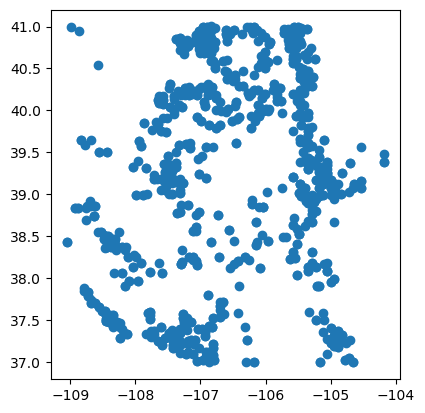

In [83]:
gdf.plot()  

In [85]:
import geopandas as gpd

In [86]:
co_bound = gpd.read_file(r'/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/Colorado_State_Boundary.geojson')

In [142]:
import seaborn as sns
cmap_tab10 = sns.color_palette("Spectral",12)
cmap_new = sns.color_palette([cmap_tab10[0], cmap_tab10[1], cmap_tab10[2],cmap_tab10[3], cmap_tab10[4], cmap_tab10[5],cmap_tab10[6], cmap_tab10[7], cmap_tab10[8],cmap_tab10[9], cmap_tab10[10], cmap_tab10[11]], as_cmap=True)
# dfs_issues.plot(ax=ax, zorder=2, label=label, markersize=50, marker='*', column='issue', categorical=True, cmap=cmap_new, legend=True)

In [123]:
sns.color_palette(cmap_new)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

Text(0.8, 0.19999999999999998, 'N')

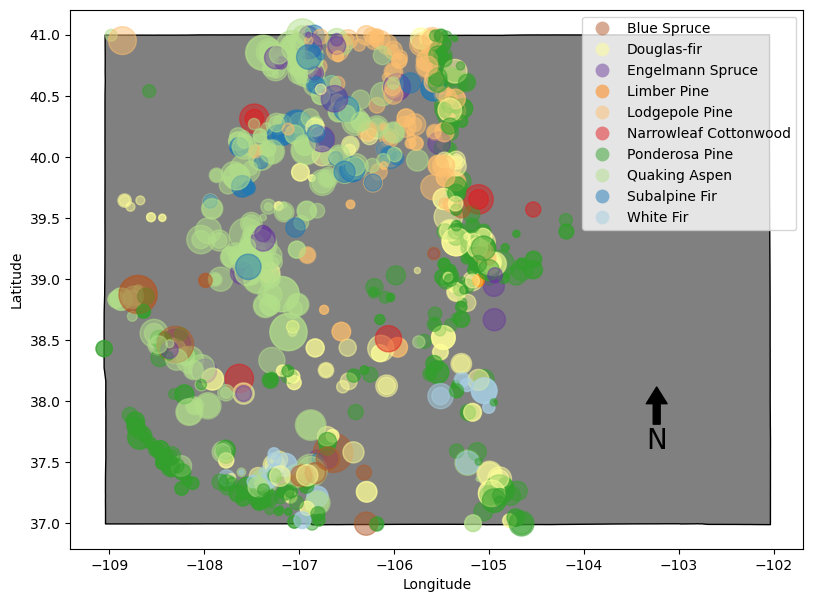

In [159]:
fig, ax = plt.subplots(figsize=(10,7))

co_bound.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,legend=True)

#You can use different 'cmaps' such as jet, plasm,magma, infereno,cividis, binary...(I simply chose cividis)

gdf.plot(ax=ax, column='species_name', 
         markersize=((gdf['growth_potential']-gdf['growth_potential'].min())/(gdf['growth_potential'].max()-gdf['growth_potential'].min()))*800,
         categorical=True,legend=True,cmap='Paired_r',alpha=.5);

# (gdf['growth_potential']/gdf['growth_potential'].max())*400
(gdf['growth_potential']-gdf['growth_potential'].min())/(gdf['growth_potential'].max()-gdf['growth_potential'].min())
# fig.suptitle('Random locations', fontsize=12)
# plt.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium') 
x, y, arrow_length = 0.8, 0.3, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

In [105]:
for index, row in gdf.iterrows():
    species = row['most_dominant']
    if species == 122:
        gdf.loc[index,'species_name'] = 'Ponderosa Pine'
    else:
        if species == 202:
            gdf.loc[index,'species_name'] =  'Douglas-fir'
        else:
            if species == 108:
                gdf.loc[index,'species_name'] =  'Lodgepole Pine'
            else:
                if species == 93:
                    gdf.loc[index,'species_name'] =  'Engelmann Spruce'
                else:
                    if species == 102:
                        gdf.loc[index,'species_name'] =  'Rocky Mountain Bristlecone Pine'
                    else:
                        if species == 113:
                            gdf.loc[index,'species_name'] =  'Limber Pine'
                        else:
                            if species == 746:
                                gdf.loc[index,'species_name'] =  'Quaking Aspen'
                            else:
                                if species == 19:
                                    gdf.loc[index,'species_name'] =  'Subalpine Fir'
                                else:
                                    if species == 96:
                                        gdf.loc[index,'species_name'] =  'Blue Spruce'
                                    else:
                                        if species == 18:
                                            gdf.loc[index,'species_name'] =  'Corkbark Fir'
                                        else:
                                            if species == 15:
                                                gdf.loc[index,'species_name'] =  'White Fir'
                                            else:
                                                if species == 749:
                                                    gdf.loc[index,'species_name'] =  'Narrowleaf Cottonwood'

In [106]:
gdf

,PLT_CN,most_dominant,most_proportion,count,average_age,CN,PREV_PLT_CN,MEASYEAR,ELEV,current_year,current_age,median_growth_rate,growth_potential,elev_meters,geometry,dominant_code,species_name
0,3645415010690,202.0,0.3955,222.667702,77.789474,3645415010690,NaN,2002,8850.0,2024,99.789474,6.412731,1427.908187,2697.480,POINT (-104.98249 39.13780),0 202.0\n1 202.0\n2 122.0\n3...,Douglas-fir
1,31663652010690,202.0,0.8389,168.505288,154.636364,31663652010690,NaN,2002,8500.0,2024,176.636364,7.122696,1200.211873,2590.800,POINT (-105.12307 39.25497),0 202.0\n1 202.0\n2 122.0\n3...,Douglas-fir
2,3646438010690,122.0,1.0000,102.306782,88.777778,3646438010690,NaN,2002,6900.0,2024,110.777778,6.963150,712.377495,2103.120,POINT (-104.53220 39.16126),0 202.0\n1 202.0\n2 122.0\n3...,Ponderosa Pine
3,31664642010690,122.0,0.5256,162.487242,55.555556,31664642010690,NaN,2002,9160.0,2024,77.555556,6.688340,1086.769904,2791.968,POINT (-105.00264 39.07311),0 202.0\n1 202.0\n2 122.0\n3...,Ponderosa Pine
4,3646668010690,122.0,0.9657,42.126322,60.500000,3646668010690,NaN,2002,9290.0,2024,82.500000,6.963150,293.331910,2831.592,POINT (-104.99418 38.98884),0 202.0\n1 202.0\n2 122.0\n3...,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,431917369489998,122.0,0.9350,90.270690,89.300000,431917369489998,3.537411e+13,2019,8350.0,2024,94.300000,6.963150,628.568378,2545.080,POINT (-108.28809 37.47147),0 202.0\n1 202.0\n2 122.0\n3...,Ponderosa Pine
1000,431917482489998,93.0,0.5408,126.378966,114.307692,431917482489998,3.537416e+13,2019,9140.0,2024,119.307692,7.084042,895.273966,2785.872,POINT (-108.36561 38.41969),0 202.0\n1 202.0\n2 122.0\n3...,Engelmann Spruce
1001,431917481489998,746.0,1.0000,42.126322,50.000000,431917481489998,3.537419e+13,2019,8700.0,2024,55.000000,4.448302,187.390594,2651.760,POINT (-108.36324 38.46970),0 202.0\n1 202.0\n2 122.0\n3...,Quaking Aspen
1002,431917480489998,746.0,0.3924,132.397012,109.400000,431917480489998,3.537416e+13,2019,9020.0,2024,114.400000,7.166425,948.813277,2749.296,POINT (-108.48208 38.46269),0 202.0\n1 202.0\n2 122.0\n3...,Quaking Aspen
